[Kaggle Titanic Competition/Tutorial](https://www.kaggle.com/c/titanic/)

In [7]:
import numpy as np # more efficient maths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#### Data Preprocessing

Dropping columns not in use

In [8]:
train_data.drop("Name", axis=1, inplace=True)
train_data.drop("Ticket", axis=1, inplace=True)
train_data.drop("Fare", axis=1, inplace=True)
train_data.drop("Cabin", axis=1, inplace=True)
train_data.drop("Embarked", axis=1, inplace=True)

test_data.drop("Name", axis=1, inplace=True)
test_data.drop("Ticket", axis=1, inplace=True)
test_data.drop("Fare", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Embarked", axis=1, inplace=True)

Dropping nulls

In [9]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

Replacing data with machine readable data (i.e. gender: 0 --> female, 1 --> male)

In [10]:
train_data.replace(to_replace={"female": 0, "male": 1}, inplace=True)

test_data.replace(to_replace={"female": 0, "male": 1}, inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


#### Data Visualisation

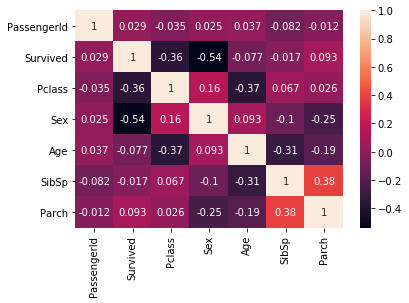

In [11]:
sns.heatmap(train_data.corr(), annot = True);

#### Making & Training Model

In [12]:
y_train = train_data.Survived
X_train = train_data.drop("Survived", axis=1)
X_test = test_data

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

train_data.Survived.value_counts(normalize= True)

#create the model instance
model = RandomForestRegressor()

#fit the model on the training data
model.fit(X_train, y_train)

prediction = model.predict(X_test)

df = pd.DataFrame({"prediction": prediction})
df

,prediction
0,0.01
1,0.28
2,0.19
3,0.39
4,0.30
...,...
327,0.64
328,0.96
329,0.47
330,0.97
